### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

In [3]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

In [4]:
# Reshape X to a 2D array with one column
X = X.reshape(-1, 1)

# Add a column of 1s to X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

print("Shape of the array", X.shape)


Shape of the array (70, 2)


In [5]:
# Split (X,Y) data into training and test paritions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)



X_train shape :  (56, 2)
X_test shape :  (14, 2)
Y_train shape :  (56,)
Y_test shape :  (14,)


---
### Step 3: Exploratory data analysis (EDA)

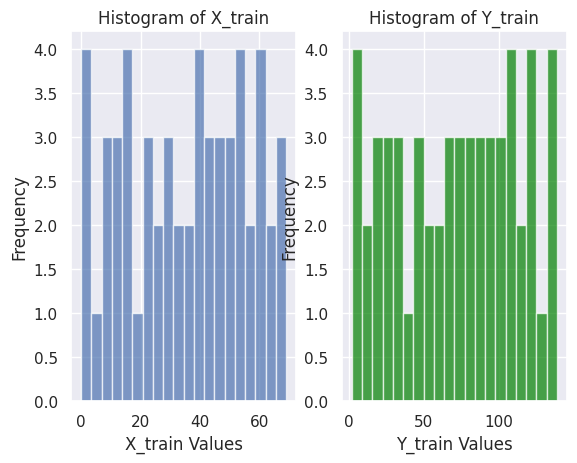

In [6]:
import seaborn as sns  # for nicer plots
sns.set(style='darkgrid')  # default style

# Create side-by-side histograms
plt.figure()

# Histogram for X_train
plt.subplot(1, 2, 1)
plt.hist(X_train[:,1], bins=20, alpha=0.7)
plt.title('Histogram of X_train')
plt.xlabel('X_train Values')
plt.ylabel('Frequency')

# Histogram for Y_train
plt.subplot(1, 2, 2)
plt.hist(Y_train, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Y_train')
plt.xlabel('Y_train Values')
plt.ylabel('Frequency')

# Show the plots
plt.show()

---
### Step 4: Modeling

In [7]:
# Compute predictions for all X examples at once.
#X: 56x2
#W.T: 2x1
#Y_hat: 56x1

W1 = np.array([5, 1])
W2 = np.array([1, 2])
M1_hat_train = np.dot(X_train, W1.T)
M2_hat_train = np.dot(X_train, W2.T)

print("M1_hat_train.shape: ", M1_hat_train.shape)
print("M2_hat_train.shape: ", M2_hat_train.shape)

M1_hat_train.shape:  (56,)
M2_hat_train.shape:  (56,)


In [8]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W.
    predictions = np.dot(inputs, W.T)

    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.sum(diff**2) / m

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)

    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient =  np.dot(diff, inputs) / m

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate*gradient

  return np.array(weights), np.array(losses)

In [9]:
# Run gradient_descent function with (X_train, Y_train) data.
weights1, losses1 = gradient_descent(X_train, Y_train, 0.0002, 5)
print("weights: ", weights1)
print("losses: ", losses1)

weights:  [[1.         1.        ]
 [1.00709394 1.33262886]
 [1.01183193 1.55469157]
 [1.01499708 1.7029404 ]
 [1.01711221 1.80191116]]
losses:  [1665.36666086  742.41486626  331.06572624  147.73208293   66.02235863]


---
### Step 5: Hyperparameter tuning

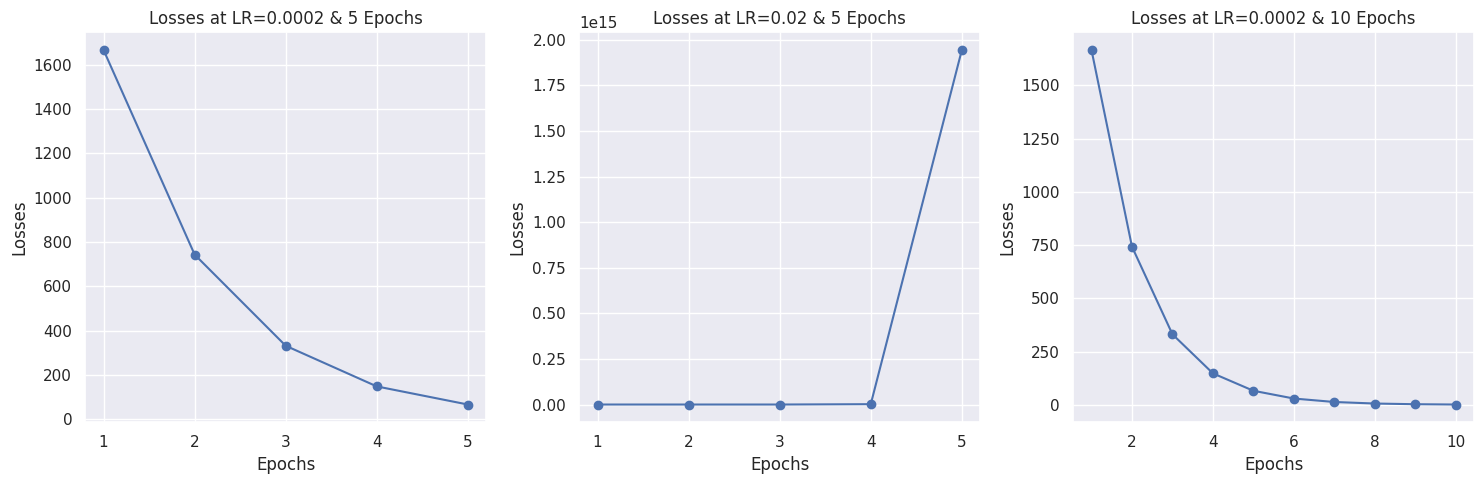

Loss at last epoch with LR:0.0002, 5 epochs:  66.0223586320446
Loss at last epoch with LR:0.02, 5 epochs:  1943544404976517.2
Loss at last epoch with LR:0.0002, 10 epochs:  1.479786682981072


In [10]:
weights2, losses2 = gradient_descent(X_train, Y_train, 0.02, 5)
weights3, losses3 = gradient_descent(X_train, Y_train, 0.0002, 10)

# Epochs for each set of losses
epochs1 = range(1, len(losses1) + 1)
epochs2 = range(1, len(losses2) + 1)
epochs3 = range(1, len(losses3) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs1, losses1, label='LR=0.0002, 5 Epochs', marker='o')
plt.title('Losses at LR=0.0002 & 5 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

plt.subplot(1, 3, 2)
plt.plot(epochs2, losses2, label='LR=0.02, 5 Epochs', marker='o')
plt.title('Losses at LR=0.02 & 5 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

plt.subplot(1, 3, 3)
plt.plot(epochs3, losses3, label='LR=0.0002, 10 Epochs', marker='o')
plt.title('Losses at LR=0.0002 & 10 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

plt.tight_layout()
plt.show()

print("Loss at last epoch with LR:0.0002, 5 epochs: ", losses1[-1])
print("Loss at last epoch with LR:0.02, 5 epochs: ", losses2[-1])
print("Loss at last epoch with LR:0.0002, 10 epochs: ", losses3[-1])


# Answer 1:
# Increasing the learning rate to 0.02 is not beneficial because the model overshoots
# the solution, causing it to diverge. The 2nd plot shows that the loss at
# the last epoch increases to 1943544404976517.2.


# Answer 2:
# Extending the model training to 10 epochs does not improve performance
# because the loss already shows a steady decrease and plateaus by the 5 epoch.
# The 3rd plot shows that the losses after the 6th epoch are nearly zero,
# showing minimal improvement compared to the 5th epoch.


In [11]:
M3_b = weights1[-1][0]
M3_w = weights1[-1][1]

print(f"The most optimal model is M3 = {M3_b:.2f} + {M3_w:.2f} X")

M3_hat_train = np.dot(X_train, weights1[-1].T)

print("M3_hat_train.shape: ", M3_hat_train.shape)


The most optimal model is M3 = 1.02 + 1.80 X
M3_hat_train.shape:  (56,)


---
### Step 6: Evaluation and Generalization

In [12]:
MSE_for_M1 = mean_squared_error(Y_train, M1_hat_train)
MSE_for_M2 = mean_squared_error(Y_train, M2_hat_train)
MSE_for_M3 = mean_squared_error(Y_train, M3_hat_train)

print(f"MSE for M1: {MSE_for_M1:.4f}")
print(f"MSE for M2: {MSE_for_M2:.4f}")
print(f"MSE for M3: {MSE_for_M3:.4f}")


# M1 poorly fits the data since it has the highest MSE
# M3 performs better than M1 but still has higher MSE than M2
# M2 has the lowest MSE, thus it is the most optimal model among the three

MSE for M1: 1397.6090
MSE for M2: 0.3281
MSE for M3: 66.0224


In [13]:
M1_hat_test = np.dot(X_test, W1.T)
M2_hat_test = np.dot(X_test, W2.T)
M3_hat_test = np.dot(X_test, weights1[-1].T)


MSE_for_M1 = mean_squared_error(Y_test, M1_hat_test)
MSE_for_M2 = mean_squared_error(Y_test, M2_hat_test)
MSE_for_M3 = mean_squared_error(Y_test, M3_hat_test)

print("MSE_for_M1: ", MSE_for_M1)
print("MSE_for_M2: ", MSE_for_M2)
print("MSE_for_M3: ", MSE_for_M3)

print("M2 generalizes well because the MSE gap between the train and test data is smaller than that of the other models")



MSE_for_M1:  1113.6003911560044
MSE_for_M2:  0.2908006971666422
MSE_for_M3:  52.31962721258453
M2 generalizes well because the MSE gap between the train and test data is smaller than that of the other models
